In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
train = torchvision.datasets.FashionMNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.FashionMNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True, num_workers=2)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False, num_workers=2)

In [6]:
dataiter = iter(trainset) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


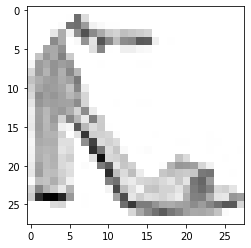

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

IndexError: index 10 is out of bounds for dimension 0 with size 10

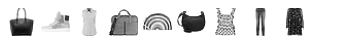

In [9]:
figure = plt.figure()

num_of_images = 60

for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [13]:
# Model creation with neural net Sequential model
model=nn.Sequential(nn.Linear(784,128), # 1 layer:- 784 input 128 o/p
                    nn.ReLU(),          # Defining Regular linear unit as activation
                    nn.Linear(128,64),  # 2 Layer:- 128 Input and 64 O/p
                    nn.Tanh(),          # Defining Regular linear unit as activation
                    nn.Linear(64,10),   # 3 Layer:- 64 Input and 10 O/P as (0-9)
                    nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
                  ) 

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [14]:
# defining the negative log-likelihood loss for calculating loss
criterion = nn.NLLLoss() 

In [15]:
images, labels = next(iter(trainset))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL-loss

In [16]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward() # to calculate gradients of parameter 
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.0429e-06,
         -1.0215e-06,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.3853e-05,
         -1.1927e-05,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  2.3040e-05,
          1.1520e-05,  0.0000e+00]])


In [18]:
# defining the optimiser with stochastic gradient descent and default parameters
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainset))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass
output = model(images)
loss = criterion(output, labels)
# the backward pass and update weights
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0303, -0.0324,  0.0030,  ..., -0.0205,  0.0330, -0.0151],
        [ 0.0031, -0.0202, -0.0088,  ..., -0.0206,  0.0342,  0.0050],
        [-0.0357,  0.0115,  0.0021,  ...,  0.0038, -0.0063, -0.0145],
        ...,
        [-0.0137, -0.0027,  0.0098,  ..., -0.0037,  0.0180, -0.0264],
        [-0.0092,  0.0314,  0.0055,  ...,  0.0108, -0.0016,  0.0236],
        [-0.0347, -0.0115, -0.0230,  ..., -0.0342, -0.0244, -0.0067]],
       requires_grad=True)


RuntimeError: Trying to resize storage that is not resizable at /pytorch/aten/src/TH/THStorageFunctions.cpp:88